In [4]:
import pandas as pd

data = pd.read_csv('../Dataset/data.csv')

In [2]:
sequence = data['sequence'][0]

## All Nucleotides Percentage

Text(0.5, 1.0, 'Pie Chart of Given Values')

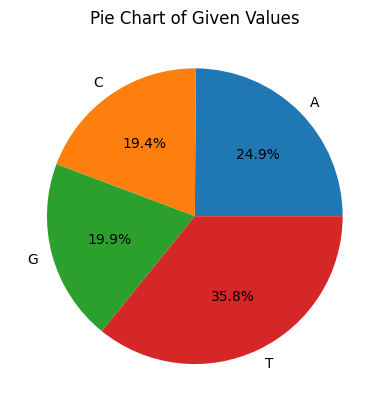

In [19]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.unique([word for word in sequence])
counts = [sequence.count(bases) for bases in labels]

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Pie Chart of Given Values")

## GC Content

In [26]:
gc_content = ((sequence.count('G') + sequence.count('C'))/sum(counts))*100

## AT Content

In [27]:
at_content = ((sequence.count('A') + sequence.count('T'))/sum(counts))*100

## Nucleotide Frequence

<Axes: xlabel='count'>

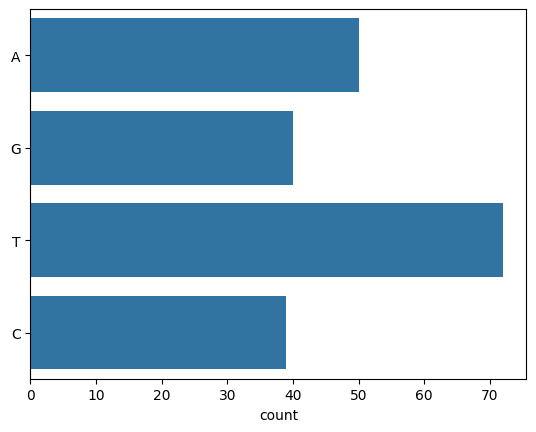

In [30]:
import seaborn as sns

sns.countplot([base for base in sequence])

## Melting Temperature (Denaturation)

In [32]:
tm = 64.9 + ((41 * (sequence.count('G') + sequence.count('C') - 16.4)) / (sum(counts)))

## Molecular Weights (Deltons or g/mol)

In [ ]:
MW = (sequence.count('A') * 313.21) + (sequence.count('T') * 304.2) + (sequence.count('G') * 329.21) + (sequence.count('C') * 289.18) - ((sum(counts) - 1) * 18.015)
f"{np.round(MW, 4)} Da"

'58406.32 Da'

## Sliding Window GC Content

In [55]:
window = 30
lst = []
for i in range(0, len(sequence), window):
    seq = sequence[i:i+window]
    lst.append(((seq.count('G') + seq.count('C'))/(seq.count('A')+seq.count('T')+seq.count('G')+seq.count('C')))*100)

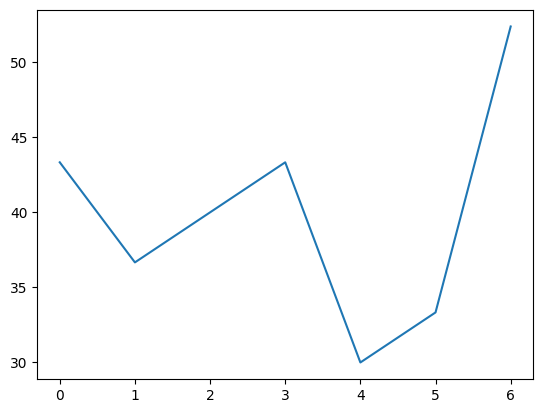

In [56]:
plt.plot(lst)

## Protein Transcription

In [ ]:
# Created by GPT
genetic_code = {
    'UUU': ('Phe', 'F'), 'UUC': ('Phe', 'F'),
    'UUA': ('Leu', 'L'), 'UUG': ('Leu', 'L'),
    'CUU': ('Leu', 'L'), 'CUC': ('Leu', 'L'), 'CUA': ('Leu', 'L'), 'CUG': ('Leu', 'L'),
    'AUU': ('Ile', 'I'), 'AUC': ('Ile', 'I'), 'AUA': ('Ile', 'I'),
    'AUG': ('Met', 'M'),  # Start codon
    'GUU': ('Val', 'V'), 'GUC': ('Val', 'V'), 'GUA': ('Val', 'V'), 'GUG': ('Val', 'V'),
    'UCU': ('Ser', 'S'), 'UCC': ('Ser', 'S'), 'UCA': ('Ser', 'S'), 'UCG': ('Ser', 'S'),
    'CCU': ('Pro', 'P'), 'CCC': ('Pro', 'P'), 'CCA': ('Pro', 'P'), 'CCG': ('Pro', 'P'),
    'ACU': ('Thr', 'T'), 'ACC': ('Thr', 'T'), 'ACA': ('Thr', 'T'), 'ACG': ('Thr', 'T'),
    'GCU': ('Ala', 'A'), 'GCC': ('Ala', 'A'), 'GCA': ('Ala', 'A'), 'GCG': ('Ala', 'A'),
    'UAU': ('Tyr', 'Y'), 'UAC': ('Tyr', 'Y'),
    'UAA': ('Stop', '*'), 'UAG': ('Stop', '*'),
    'CAU': ('His', 'H'), 'CAC': ('His', 'H'),
    'CAA': ('Gln', 'Q'), 'CAG': ('Gln', 'Q'),
    'AAU': ('Asn', 'N'), 'AAC': ('Asn', 'N'),
    'AAA': ('Lys', 'K'), 'AAG': ('Lys', 'K'),
    'GAU': ('Asp', 'D'), 'GAC': ('Asp', 'D'),
    'GAA': ('Glu', 'E'), 'GAG': ('Glu', 'E'),
    'UGU': ('Cys', 'C'), 'UGC': ('Cys', 'C'),
    'UGA': ('Stop', '*'),
    'UGG': ('Trp', 'W'),
    'CGU': ('Arg', 'R'), 'CGC': ('Arg', 'R'), 'CGA': ('Arg', 'R'), 'CGG': ('Arg', 'R'),
    'AGU': ('Ser', 'S'), 'AGC': ('Ser', 'S'),
    'AGA': ('Arg', 'R'), 'AGG': ('Arg', 'R'),
    'GGU': ('Gly', 'G'), 'GGC': ('Gly', 'G'), 'GGA': ('Gly', 'G'), 'GGG': ('Gly', 'G'),
    'UNK': ('Unknown', '-')
}


In [144]:
def get_complementary_base(base):
    complements = {'A':'U', 'T':'A', 'G':'C', 'C':'G'}
    return complements.get(base, 'N') 

dna_seq = data['sequence'][5000]

mRNA = ''.join([get_complementary_base(base) for base in dna_seq])

def translate_mRNA(mrna_seq):
    protein = []
    start_pos = mrna_seq.find('AUG')
    if start_pos == -1:
        return 'No Start Codon Found'

    for i in range(start_pos, len(mrna_seq), 3):
        codon = mrna_seq[i:i+3]
        if len(codon) < 3:
            break
        aa = genetic_code.get(codon, genetic_code['UNK'])
        if aa[0] == 'Stop':
            break
        protein.append(aa[1])
    return ''.join(protein)

protein_seq = translate_mRNA(mRNA)
print(protein_seq)

MHDPPDKGDPLRLLRPEASACAGSSGHTWSMSPPCRTQPQSHWSRPHEDSTPA


## Nucleotide Skew

- GC Skew

In [145]:
gc_skew = (sequence.count('G') - sequence.count('C')) / (sequence.count('G') + sequence.count('C'))

- AT Skew

In [147]:
at_skew = (sequence.count('A') - sequence.count('T')) / (sequence.count('A') + sequence.count('T'))

## Sequence Complexity

- Shannon Entropy's formula:

H = −∑ pi log 2 pi

In [ ]:
import math
from collections import Counter

def shannon_entropy(seq):
    length = len(seq)
    counts = Counter(seq)
    entropy = 0.0
    for base in counts:
        p = counts[base] / length
        entropy -= p * math.log2(p)
    return entropy

print("Entropy of seq:", shannon_entropy(data['sequence'][0])) # 0 means minimum and 2 means maximum entropy

Entropy of seq: 1.9523690049913422
